<a href="https://colab.research.google.com/github/ProjektVek/TCC-UNIP/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Aprendizado de máquina aplicado à detecção de fraudes de cartão de crédito:</h1></center>

---

 <center><h2>TCC 2023 - Ciência da Computação - UNIP Campinas</h2></center>

---
## Integrantes:
  <ul>
     <li><h2>Davi Ferreira Ribeiro - F21AFG6</h2></li>
     <li><h2>Ryan Vitor Rodrigues Teixeira - N662BC4</h2></li>
     <li><h2>Victor Hugo Souza Ferreira - N587FF6</h2></li>
  </ul>
</h2>






### Importando Bibliotecas:
<ul>
<li>Numpy</li>
<li>Pandas</li>
<li>MatPlotLib</li>
<li>SciKitLearn</li>
</ul>

In [7]:
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as plot
import sklearn as skl

#faz o matplotlib renderizar no notebook
%matplotlib inline

### Lendo Arquivo CSV:

In [4]:
folder = "drive/MyDrive/TCC/"
archive = "creditcard.csv"
csv_dataset = pnd.read_csv(folder+archive)

In [5]:
csv_dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### Análise dos Dados:

In [11]:
# Importando biblioteca squarify, que auxiliará na geração de gráficos
!pip install squarify
import squarify

In [32]:
# Contando o número de fraudes e de transções válidas:
all_transactions_numbers = csv_dataset.Amount.count()
fraud_numbers = csv_dataset.Amount[csv_dataset.Class==1].count()
valid_numbers = csv_dataset.Amount[csv_dataset.Class==0].count()

In [33]:
print("Quantidade de transações: " + str(all_transactions_numbers))
print("Quantidade de fraudes: " + str(fraud_numbers))
print("Quantidade de transações válidas: " + str(valid_numbers), end="\n")

Quantidade de transações: 284807
Quantidade de fraudes: 492
Quantidade de transações válidas: 284315


In [34]:
fraud_percentage = fraud_numbers/all_transactions_numbers
valid_percentage = valid_numbers/all_transactions_numbers

In [35]:
print(f'Porcentagem de fraudes: {"{:.2f}".format(fraud_percentage*100)}%')
print(f'Porcentagem de transações válidas: {"{:.2f}".format(valid_percentage*100)}%')

Porcentagem de fraudes: 0.17%
Porcentagem de transações válidas: 99.83%


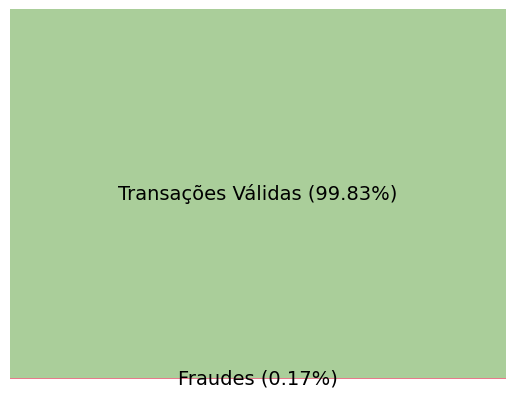

In [37]:
# Gerando o gráfico: quantidade de fraudes vs transações válidas (Treemap)
quantities = [fraud_percentage, valid_percentage]
labels = [f'Fraudes ({"{:.2f}".format(fraud_percentage*100)}%)',
          f'Transações Válidas ({"{:.2f}".format(valid_percentage*100)}%)']
colors = ['#de425b', '#87ba70']

plot.rc('font', size=14)
squarify.plot(sizes=quantities, label=labels, color=colors, alpha=0.7)
plot.axis('off')

plot.show()

### Distribuição dos Dados no tempo:

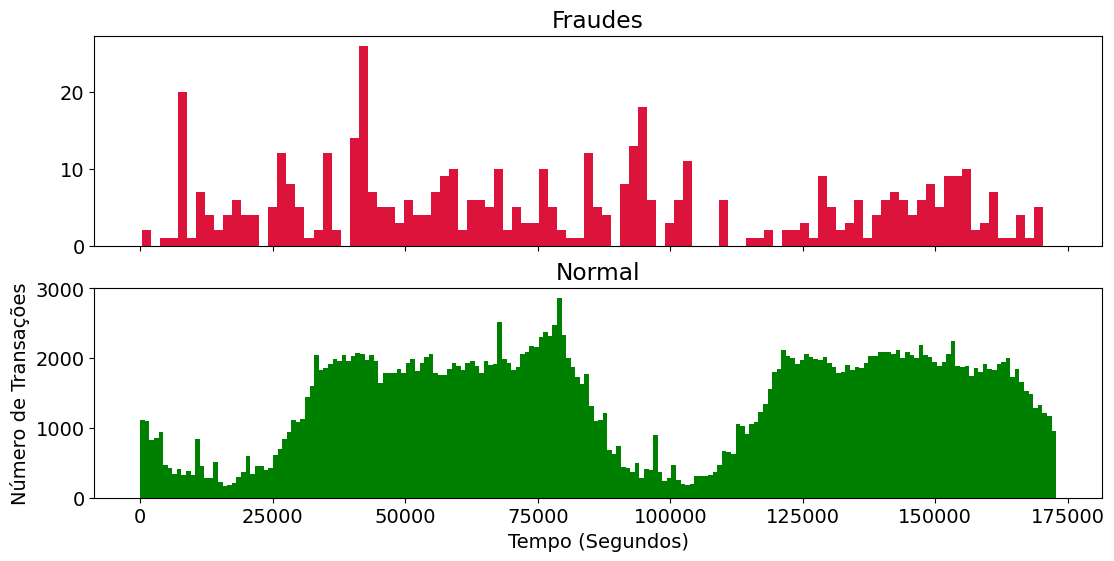

In [51]:
figure, (axe1, axe2) = plot.subplots(2, 1, sharex=True, figsize=(13,6))

axe1.hist(csv_dataset.Time[csv_dataset.Class==1], bins=100, color='crimson')
axe1.set_title('Fraudes')

axe2.hist(csv_dataset.Time[csv_dataset.Class==0], bins=200, color='green')
axe2.set_title('Normal')

plot.xlabel('Tempo (Segundos)')
plot.ylabel('Número de Transações')
plot.show()
